<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/pH_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

# 2. Loading the Data into a Pandas DataFrame

Code Block 2A

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 3. Load the CSV File

Code Block 3A

In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/PH_Features - Final.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Temperature C,Average pH,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Dissolved Oxygen mg/l,Average pH + 1 day,Average pH + 1 week,Average pH + 4 weeks
0,2024-05-01,19.8,8.3,1185.3,39.7,9.9,8.3,8.1,7.7
1,2024-05-02,20.0,8.3,1007.0,43.1,9.8,8.3,8.2,7.7
2,2024-05-03,20.9,8.3,864.5,41.4,9.7,8.1,8.1,7.7
3,2024-05-04,19.7,8.1,831.7,37.6,8.7,8.1,8.1,7.7
4,2024-05-05,18.7,8.1,825.8,33.8,9.0,8.1,8.1,7.6


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average pH + 1 day', 'Average pH + 1 week', 'Average pH + 4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average pH + 1 day', 'Average pH + 1 week', 'Average pH + 4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 5)
X_test shape: (19, 5)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[7.74 7.66 7.59]
 [7.61 7.64 7.69]
 [7.6  7.54 7.62]
 [7.4  7.61 7.96]
 [8.21 8.15 7.7 ]
 [7.68 7.62 7.61]
 [7.77 7.72 7.6 ]
 [7.53 7.53 8.  ]
 [8.09 7.9  7.77]
 [7.74 7.6  7.55]
 [7.54 8.06 7.94]
 [7.68 7.67 7.59]
 [7.76 7.66 7.59]
 [7.6  7.42 8.05]
 [8.05 7.65 7.75]
 [8.11 8.09 7.64]
 [7.83 7.62 7.76]
 [7.7  7.62 7.61]
 [7.65 7.62 7.63]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[7.74 7.66 7.59]
 [7.61 7.64 7.69]
 [7.6  7.54 7.62]
 [7.4  7.61 7.96]
 [8.21 8.15 7.7 ]
 [7.68 7.62 7.61]
 [7.77 7.72 7.6 ]
 [7.53 7.53 8.  ]
 [8.09 7.9  7.77]
 [7.74 7.6  7.55]
 [7.54 8.06 7.94]
 [7.68 7.67 7.59]
 [7.76 7.66 7.59]
 [7.6  7.42 8.05]
 [8.05 7.65 7.75]
 [8.11 8.09 7.64]
 [7.83 7.62 7.76]
 [7.7  7.62 7.61]
 [7.65 7.62 7.63]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 2)

print(rounded_y_test)

[[7.8 7.8 7.4]
 [7.6 7.7 7.6]
 [7.6 7.5 7.5]
 [7.6 7.6 8. ]
 [8.3 8.1 7.7]
 [7.6 7.6 7.6]
 [7.8 7.8 7.5]
 [7.4 7.7 7.9]
 [8.1 8.  7.9]
 [7.8 7.6 7.4]
 [7.5 8.2 7.9]
 [7.7 7.7 7.5]
 [8.2 7.9 7.8]
 [7.5 7.4 8.2]
 [8.2 7.7 7.8]
 [8.1 8.1 7.6]
 [7.7 7.6 7.8]
 [7.7 7.6 7.6]
 [7.6 7.6 7.8]]


# 6. Feature Importance

Code Block 6A

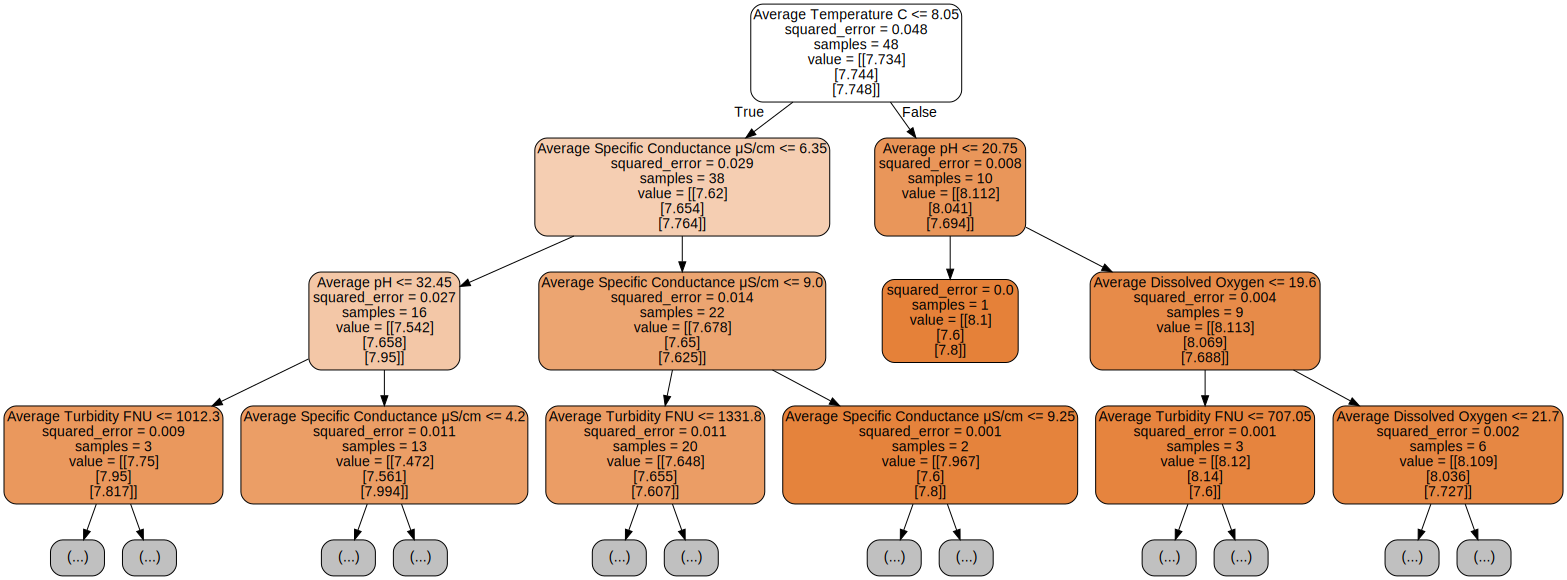

In [ ]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 3

tree = model.estimators_[tree_number]

feature_names = ['Average Dissolved Oxygen', 'Average Temperature C',	'Average Turbidity FNU', 'Average pH', 'Average Specific Conductance μS/cm']

dot_data = export_graphviz(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)

graph = graphviz.Source(dot_data)
graph.render("water_tree")
graph

Code Block 6B

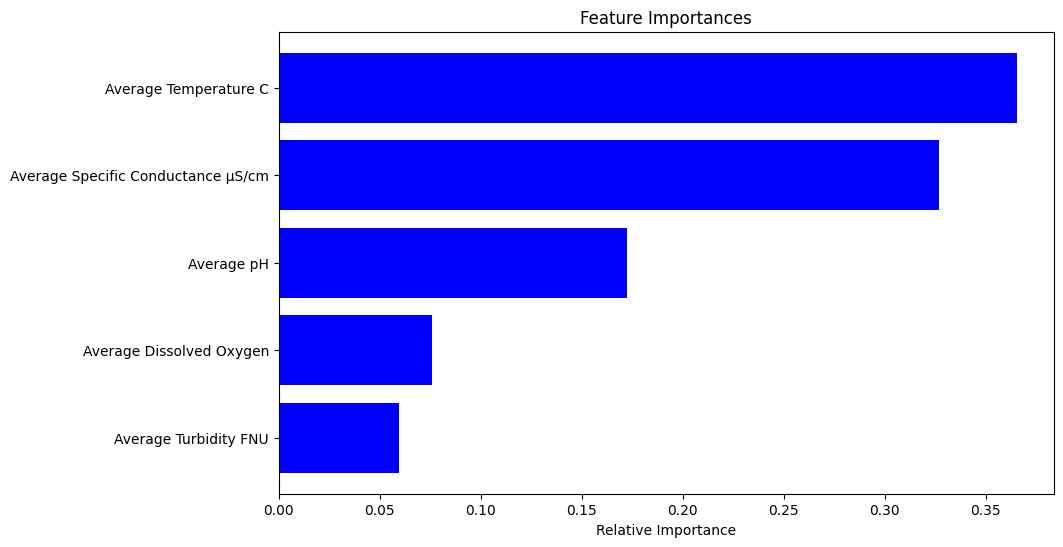

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()